library

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Importing Normalisation library
from sklearn.preprocessing import MinMaxScaler

# Importing Keras libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Importing Metrics libraries
import math
from sklearn.metrics import mean_squared_error

Data Loading

In [13]:
data=pd.read_excel('drive/My Drive/541/Train_dataset.xlsx')
data.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [14]:
data.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,7.390000e+02,2.950000e+02,777.000000,769.000000,770.000000,761.000000,629.000000,647.000000,6.460000e+02,772.000000,6.970000e+02,787.00000
mean,3.102834e+05,5.320451e+05,905.712999,26.183355,30.941558,96.086728,150.373609,0.497069,2.910011e+05,41.849741,1.457945e+06,6615.64676
std,8.874849e+05,1.067831e+06,37.018542,2.113063,6.968289,30.532991,29.063767,0.293421,8.354348e+05,29.086939,1.664151e+06,15108.10276
min,3.677600e+04,2.935400e+04,818.000000,23.000000,5.000000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.00000
25%,5.255000e+04,1.694320e+05,877.000000,24.000000,28.000000,70.000000,125.000000,0.238586,4.514450e+04,18.000000,2.378540e+05,2270.00000
50%,7.910600e+04,2.366000e+05,906.000000,26.000000,31.000000,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05,2582.00000
75%,2.374765e+05,4.745850e+05,928.000000,28.000000,36.000000,119.000000,176.000000,0.752517,2.206772e+05,67.000000,3.104060e+06,8761.00000
max,1.244237e+07,1.197845e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06,218502.00000


In [15]:
data.isna().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

Finding Null Values

In [17]:
data['Population [2011]']=data['Population [2011]'].fillna(0)
data['Popuation [2001]']=data['Popuation [2001]'].fillna(0)
data['Sex Ratio']=data['Sex Ratio'].fillna(0)
data['Median Age']=data['Median Age'].fillna(0)
data['Avg Temp']=data['Avg Temp'].fillna(0)
data['Toilets Avl']=data['Toilets Avl'].fillna(0)
data['Water Purity']=data['Water Purity'].fillna(0)
data['H Index']=data['H Index'].fillna(0)
data['Female Population']=data['Female Population'].fillna(0)
data['# of hospitals']=data['# of hospitals'].fillna(0)
data['Foreign Visitors']=data['Foreign Visitors'].fillna(0)
data['SWM']=data['SWM'].fillna("ZERO")

Filling Null Values

In [18]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['City']= label_encoder.fit_transform(data['City']) 
data['City'].unique()
data['State']= label_encoder.fit_transform(data['State']) 
data['State'].unique()
data['Type']= label_encoder.fit_transform(data['Type']) 
data['Type'].unique()
data['SWM']= label_encoder.fit_transform(data['SWM']) 
data['SWM'].unique()



data.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,378,16,10,12442373.0,11978450.0,878.0,23.0,32.0,2,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,135,6,10,11007835.0,9879172.0,858.0,27.0,30.0,2,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,52,13,16,8436675.0,4301326.0,936.0,28.0,37.0,0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,210,28,16,6809970.0,3637483.0,930.0,23.0,31.0,2,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,3,8,16,5570585.0,3520085.0,852.0,29.0,25.0,1,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


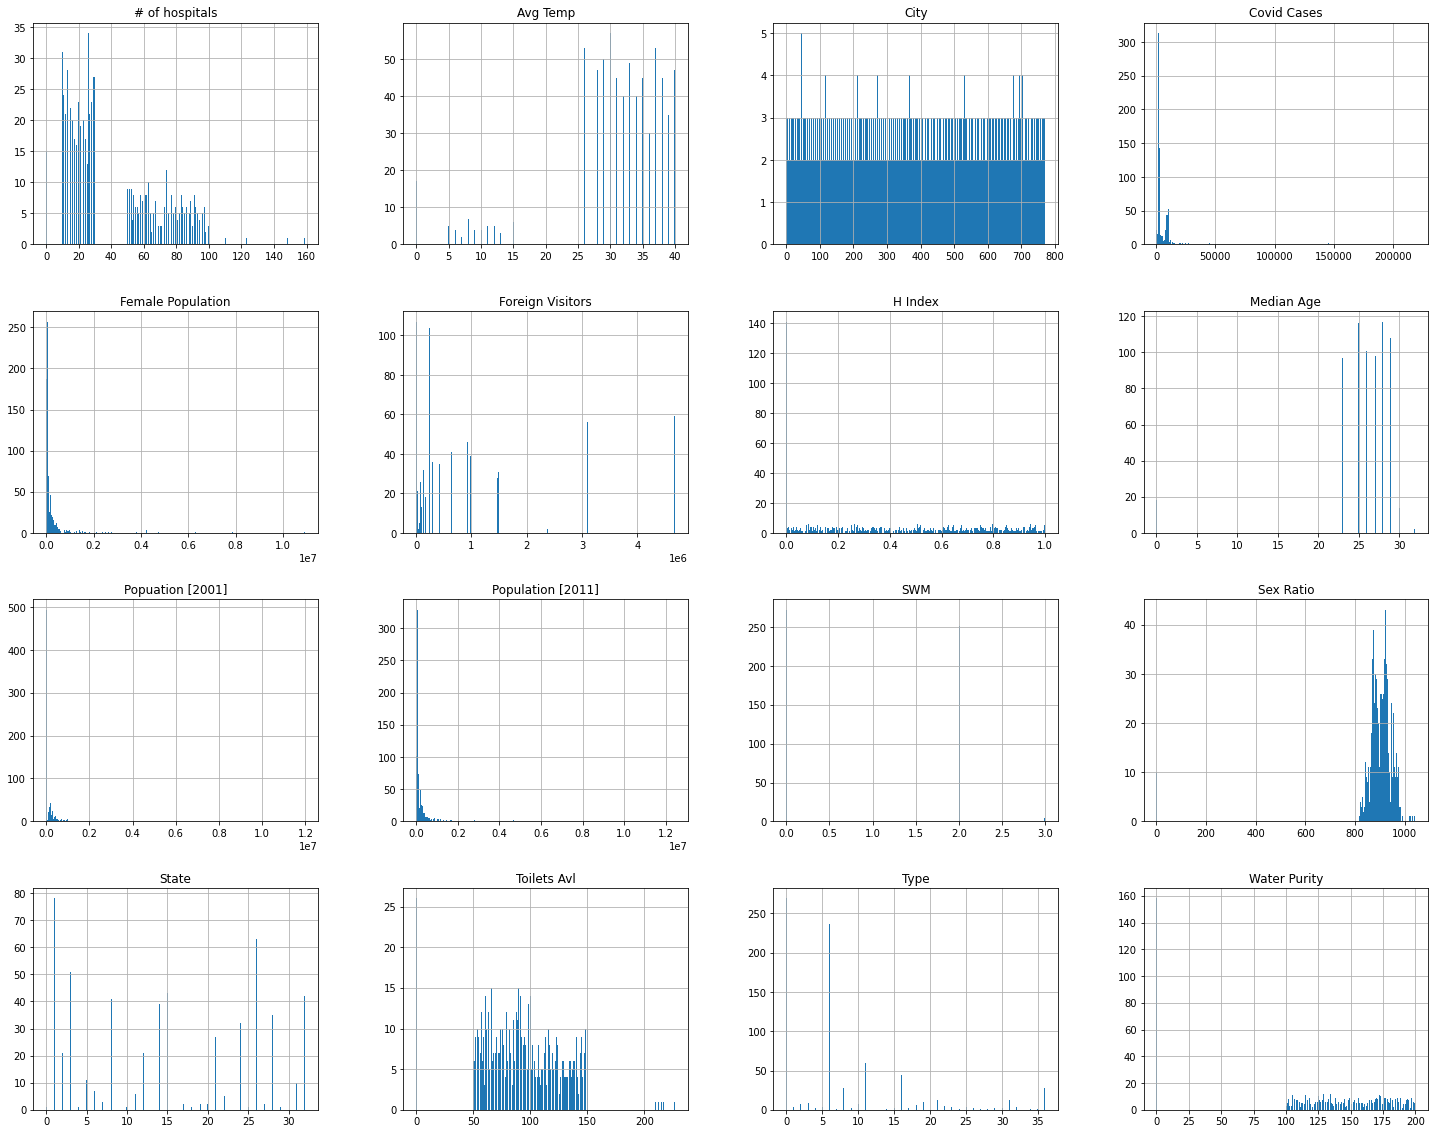

In [19]:
data.hist(bins=300, figsize=(25,20)) 
plt.show()

Heat Map

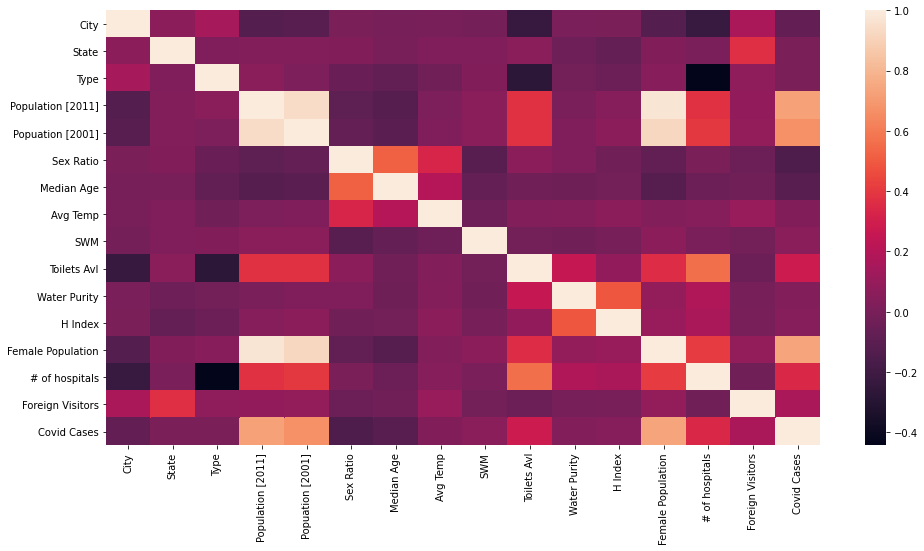

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr()) #Correlation between columns

In [21]:
training_set = data.iloc[:, 1:2].values

In [23]:
sc = MinMaxScaler(feature_range= (0,1))

In [24]:
scaled_training_set = sc.fit_transform(training_set)

In [25]:
x_train, y_train = zip(*[(scaled_training_set[i-16:i, 0]
                          ,scaled_training_set[i, 0])
                          for i in range(16, 758)])

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [28]:
INPUT_SHAPE = (x_train.shape[1], 1)
BATCH_SIZE = 32

 RNN Regressor

In [29]:
rnn_regressor = Sequential()

In [30]:
rnn_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = INPUT_SHAPE))
rnn_regressor.add(Dropout(0.2))

In [31]:
rnn_regressor.add(LSTM(units = 50, return_sequences = True))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(LSTM(units = 50, return_sequences = True))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(LSTM(units = 50, return_sequences = True))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(LSTM(units = 50))
rnn_regressor.add(Dropout(0.2))

In [32]:
rnn_regressor.add(Dense(units = 1))

In [33]:
rnn_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
rnn_regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 16, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16, 50)            2

In [35]:
epochs = 100
history = rnn_regressor.fit(
    x = x_train,
    y = y_train,
    epochs = epochs,
    batch_size = BATCH_SIZE
)

Epoch 1/100
24/24 [==============================] - 1s 38ms/step - loss: 0.1503
Epoch 2/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1055
Epoch 3/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1071
Epoch 4/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1049
Epoch 5/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1067
Epoch 6/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1061
Epoch 7/100
24/24 [==============================] - 1s 36ms/step - loss: 0.1049
Epoch 8/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1046
Epoch 9/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1032
Epoch 10/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1031
Epoch 11/100
24/24 [==============================] - 1s 37ms/step - loss: 0.1056
Epoch 12/100
24/24 [==============================] - 1s 38ms/step - loss: 0.1052
Epoch 13/100
24/24 [=====

In [36]:
data_test = pd.read_excel('drive/My Drive/541/Test_dataset.xlsx')

In [37]:
data_test.isna().sum()

City                   0
State                  0
Type                   2
Population [2011]      6
Popuation [2001]     501
Sex Ratio              5
Median Age            13
Avg Temp              14
SWM                    9
Toilets Avl           22
Water Purity          19
H Index               15
Female Population     15
# of hospitals        17
Foreign Visitors      17
dtype: int64

In [38]:
data_test['Population [2011]']=data_test['Population [2011]'].fillna(0)
data_test['Popuation [2001]']=data_test['Popuation [2001]'].fillna(0)
data_test['Sex Ratio']=data_test['Sex Ratio'].fillna(0)
data_test['Median Age']=data_test['Median Age'].fillna(0)
data_test['Avg Temp']=data_test['Avg Temp'].fillna(0)
data_test['Toilets Avl']=data_test['Toilets Avl'].fillna(0)
data_test['Water Purity']=data_test['Water Purity'].fillna(0)
data_test['H Index']=data_test['H Index'].fillna(0)
data_test['Female Population']=data_test['Female Population'].fillna(0)
data_test['# of hospitals']=data_test['# of hospitals'].fillna(0)
data_test['Foreign Visitors']=data_test['Foreign Visitors'].fillna(0)
data_test['SWM']=data_test['SWM'].fillna("ZERO")
data_test['Type']=data_test['Type'].fillna("ZERO")

In [39]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data_test['City']= label_encoder.fit_transform(data_test['City']) 
data_test['City'].unique()
data_test['State']= label_encoder.fit_transform(data_test['State']) 
data_test['State'].unique()
data_test['Type']= label_encoder.fit_transform(data_test['Type']) 
data_test['Type'].unique()
data_test['SWM']= label_encoder.fit_transform(data_test['SWM']) 
data_test['SWM'].unique()



data_test.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,450,19,24,36774.0,0.0,931.0,23.0,10.0,2,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,69,12,26,36754.0,0.0,934.0,25.0,38.0,0,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,495,21,13,36732.0,0.0,883.0,29.0,35.0,0,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,490,15,12,36706.0,0.0,887.0,26.0,31.0,0,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,432,26,18,36669.0,0.0,877.0,28.0,39.0,1,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [40]:

cases1 = data_test.iloc[:, 1:14].values

In [41]:
data_total1 = data['Covid Cases']
inputs1 = data_total1[len(data_total1) - len(data_test) - 60:].values  # values for making this a numpy array

# Reshaping
inputs1 = inputs1.reshape(-1,1)

In [42]:
inputs1= sc.transform(inputs1)

In [43]:
x_test1= [inputs1[i-60:i, 0] for i in range(60, 80)]    
x_test1 = np.array(x_test1)

In [44]:
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

In [45]:
predicted_cases1 = rnn_regressor.predict(x_test1)

In [46]:
predicted_cases1 = sc.inverse_transform(predicted_cases1)

Output 2 : Predicted Cases 

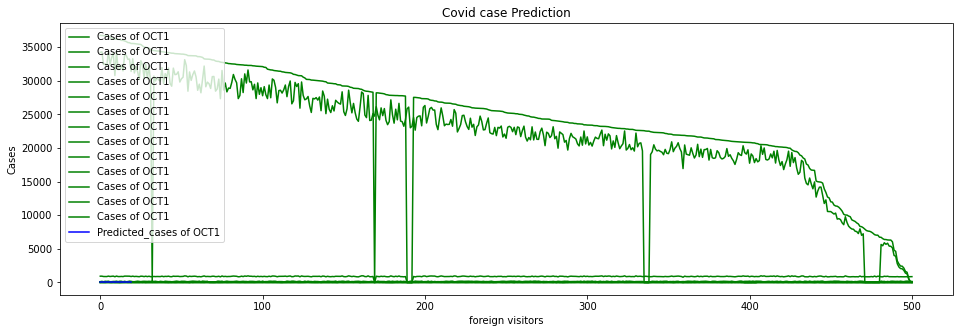

In [47]:
plt.figure(figsize=(16, 5))
plt.plot(cases1, color = 'green', label = 'Cases of OCT1')
plt.plot(predicted_cases1, color = 'blue', label = 'Predicted_cases of OCT1')
plt.title('Covid case Prediction')
plt.xlabel('foreign visitors')
plt.ylabel('Cases')
plt.legend(loc='upper left')
plt.show()